# ML project

In this project we will explore a dataset with the following columns:
- **RowNumber**—corresponds to the record number.
- **CustomerId**—contains the identification number of the client.
- **Surname**—the surname of the customer.
- **CreditScore**—can have an effect on customer churn, since a customer with a higher credit score is less likely to 
leave the bank.
- **Geography**—the customer’s location.
- **Gender**—the customer's gender.
- **Age**—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- **Tenure**—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- **Balance**—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- **NumOfProducts**—refers to the number of products that a customer has purchased through the bank.
- **HasCrCard**—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- **IsActiveMember**—active customers are less likely to leave the bank.
- **EstimatedSalary**—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- **Exited**—whether or not the customer left the bank.
- **Complain**—customer has complaint or not.
- **Satisfaction Score**—Score provided by the customer for their complaint resolution.
- **Card Type**—type of card hold by the customer.
- **Points Earned**—the points earned by the customer for using credit card.


The idea for this project is a pedagogical one: try to explore as many techniques as you can. I understand you have jobs and families and things to do, so I will focus more on the rigor rather than the quantity. 

## Minimum requirements:

1. Explore the data statistics as you have learned in our and previous modules.
2. Validation techniques: train/validation/test split is the minimum and most common one, but feel free to explore others.
3. Choose a classification model and train it.
4. Check the metrics.


## Optional things to learn more (ask me if you had any questions):

1. Outlier detection
2. Feature selection and dimensionality reduction techniques
3. Imbalanced dataset techniques
4. Hyperparameter tunning
5. Statistical tests

### NOTE: it is important to comment with text *every step* to show that you understand what you are doing

In [1]:
# Import the Customer-Churn-Records.csv file and HAVE FUN
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

data=pd.read_csv('Customer-Churn-Records.csv')
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [3]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [6]:
data.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_columns)

['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score', 'Point Earned']


### 1st - Separar as variáveis categóricas das numéricas

In [8]:
#O nosso Target é a variável Exited
y = data['Exited']
X = data.drop(columns=['Surname','RowNumber', 'CustomerId', 'Exited'])
print(X.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')


In [9]:
categorical_cols = ['Surname', 'Geography', 'Gender', 'Card Type']
numerical_cols = X.columns.difference(categorical_cols)
print(numerical_cols)

Index(['Age', 'Balance', 'Complain', 'CreditScore', 'EstimatedSalary',
       'HasCrCard', 'IsActiveMember', 'NumOfProducts', 'Point Earned',
       'Satisfaction Score', 'Tenure'],
      dtype='object')


### 2nd - Validar a existência de outliers, Standardizar a escala, para que a escala seja equivalente para todas as variáveis

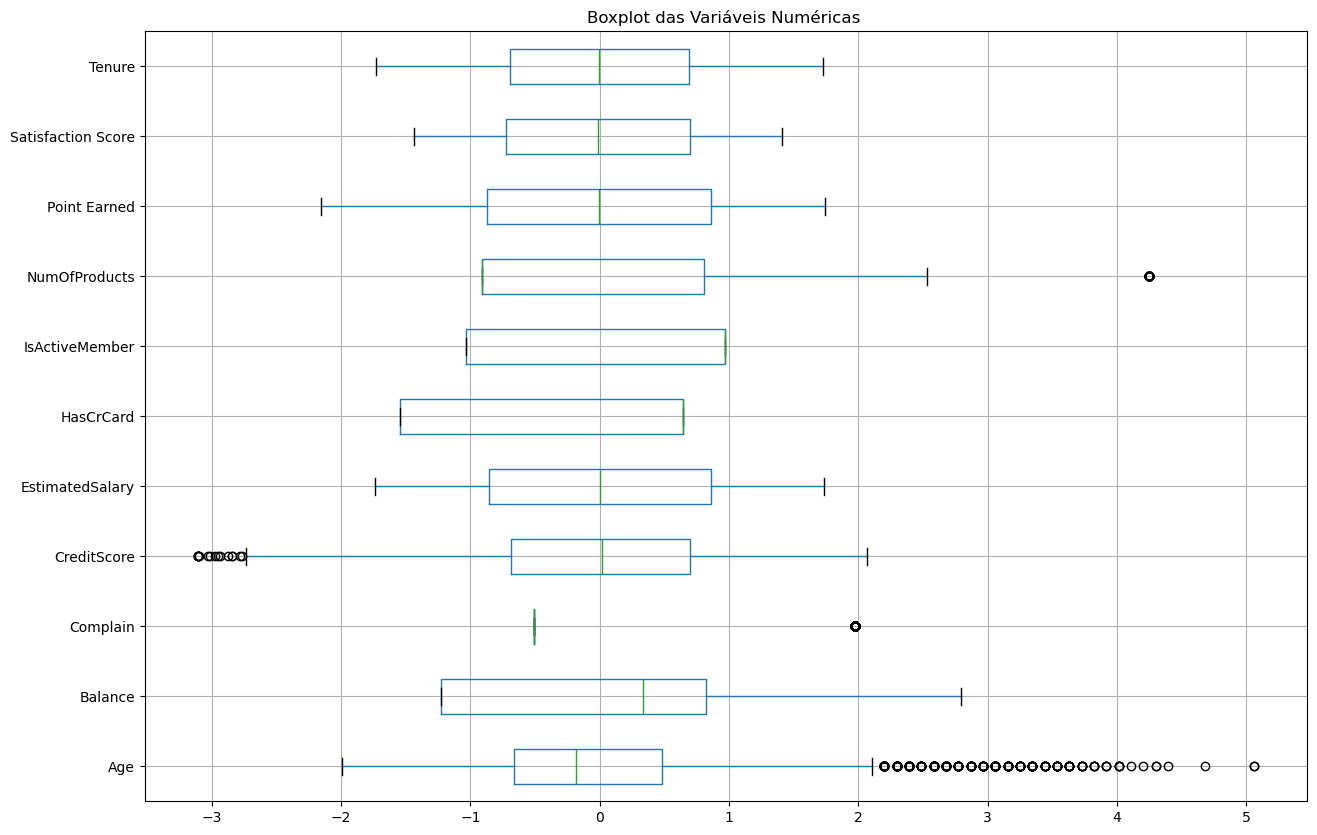

In [10]:
# Padronizar as variáveis numéricas
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X[numerical_cols]), columns=numerical_cols)

# Criar o boxplot para as variáveis numéricas padronizadas
plt.figure(figsize=(15, 10))
X_scaled.boxplot(vert=False)
plt.title('Boxplot das Variáveis Numéricas ')
plt.show()

Podemos verificar que existem outliers para as variáveis NumOFProducts, CreditScore, Complain e Age. No entanto vamos ignorar para a nossa análise.

### 3rd - Verificar correlação entre as variáveis 

Correlação das variáveis com o target 'Exited':
Exited                1.000000
Complain              0.995693
Age                   0.285296
Balance               0.118577
Geography             0.035712
EstimatedSalary       0.012490
Point Earned         -0.004628
Satisfaction Score   -0.005849
HasCrCard            -0.006976
Card Type            -0.010861
Tenure               -0.013656
CreditScore          -0.026771
NumOfProducts        -0.047611
Gender               -0.106267
IsActiveMember       -0.156356
Name: Exited, dtype: float64


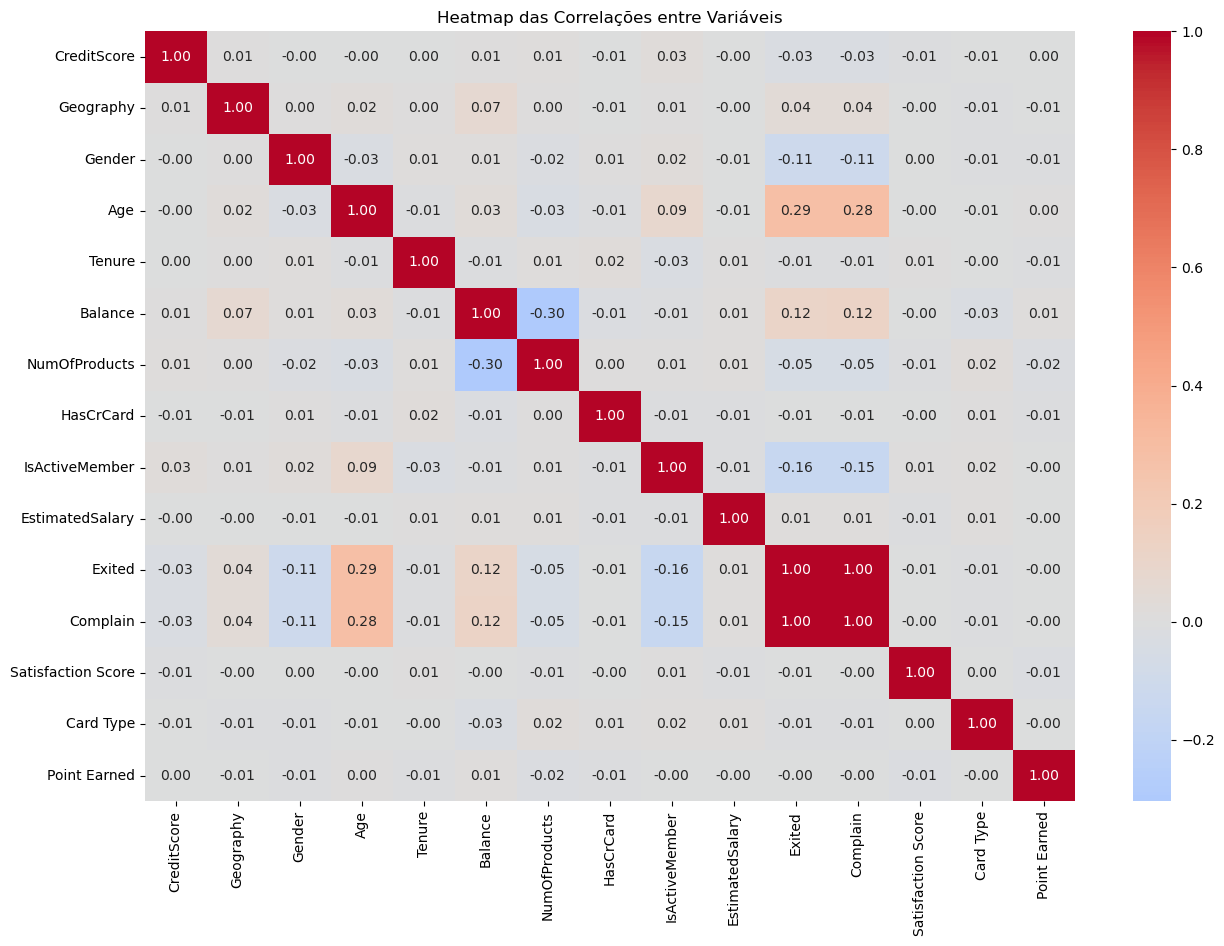

In [11]:
# Excluir colunas desnecessárias
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Codificar as colunas categóricas como códigos numéricos
data_encoded = data.copy()
categorical_cols = ['Geography', 'Gender', 'Card Type']
for col in categorical_cols:
    data_encoded[col] = data_encoded[col].astype('category').cat.codes

# Calcular a matriz de correlação
correlation_matrix = data_encoded.corr()

# Filtrar as correlações com o target 'Exited'
correlation_with_target = correlation_matrix['Exited'].sort_values(ascending=False)

# Exibir a correlação das variáveis com 'Exited'
print("Correlação das variáveis com o target 'Exited':")
print(correlation_with_target)

# Plotar um heatmap das correlações
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Heatmap das Correlações entre Variáveis')
plt.show()

Conclusões Gerais:

A variável mais fortemente correlacionada com Exited é Complain, sugerindo que reclamações são um indicador chave para a saída dos clientes.

As variáveis Age e Balance também mostram alguma correlação positiva, mas são muito mais fracas.

Muitas das outras variáveis têm correlações muito fracas ou insignificantes, indicando que elas não têm um impacto linear forte na saída dos clientes.
As variáveis Satisfaction Score, CreditScore, NumOfProducts, e Gender têm correlações negativas, mas essas correlações são todas fracas, indicando uma tendência leve para menor saída entre clientes com esses atributos.

Concluindo, temos de tirar a variável Complain para estimar o nosso modelo.

#### 4th - Transformar as colunas categóricas em colunas numéricas com o OneHotEncoder

In [12]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical_cols = pd.DataFrame(encoder.fit_transform(X[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))


In [13]:
## Concatenar as colunas codificadas
X = X.drop(columns=categorical_cols)
X = X.drop(columns=['Complain'])
X = pd.concat([X.reset_index(drop=True), encoded_categorical_cols.reset_index(drop=True)], axis=1)
print(X)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Satisfaction Score  Point Earned  \
0                  1        101348.88                   2           464 

### 5th - Dividir os dados para treino, validação e teste

In [27]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir o conjunto de treino em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
8588,712,29,7,77919.78,1,1,0,122547.58,3,983,0.0,1.0,0.0,0.0,0.0,1.0
3178,542,39,4,109949.39,2,1,1,41268.65,4,339,0.0,0.0,0.0,0.0,0.0,1.0
5200,512,42,9,93955.83,2,1,0,14828.54,5,580,1.0,0.0,1.0,0.0,1.0,0.0
8889,580,39,9,128362.59,1,1,0,86044.98,1,456,0.0,0.0,0.0,1.0,0.0,0.0
5789,689,55,1,76296.81,1,1,0,42364.75,3,908,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8871,466,30,3,0.00,1,1,0,193984.60,2,671,0.0,0.0,0.0,0.0,1.0,0.0
9826,789,40,4,0.00,2,1,0,137402.27,2,787,0.0,1.0,0.0,0.0,0.0,1.0
5268,691,28,1,0.00,2,0,0,92865.41,5,569,0.0,0.0,1.0,1.0,0.0,0.0
9666,758,35,5,0.00,2,1,0,95009.60,5,921,0.0,1.0,1.0,0.0,0.0,1.0


In [28]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(6000, 16) (2000, 16) (2000, 16)
(6000,) (2000,) (2000,)


In [29]:
# Criar um objeto MinMaxScaler
mms = MinMaxScaler(feature_range=(0, 1))

# Normalizar X_train
X_train_norm = pd.DataFrame(index=X_train.index, columns=X_train.columns, data=mms.fit_transform(X_train))

# Normalizar X_val
X_val_norm = pd.DataFrame(index=X_val.index, columns=X_val.columns, data=mms.transform(X_val))

# Normalizar X_test
X_test_norm = pd.DataFrame(index=X_test.index, columns=X_test.columns, data=mms.transform(X_test))

X_train_norm

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
8588,0.724,0.169231,0.7,0.326862,0.000000,1.0,0.0,0.612653,0.50,0.978589,0.0,1.0,0.0,0.0,0.0,1.0
3178,0.384,0.323077,0.4,0.461221,0.333333,1.0,1.0,0.206016,0.75,0.167506,0.0,0.0,0.0,0.0,0.0,1.0
5200,0.324,0.369231,0.9,0.394131,0.333333,1.0,0.0,0.073736,1.00,0.471033,1.0,0.0,1.0,0.0,1.0,0.0
8889,0.460,0.323077,0.9,0.538462,0.000000,1.0,0.0,0.430031,0.00,0.314861,0.0,0.0,0.0,1.0,0.0,0.0
5789,0.678,0.569231,0.1,0.320054,0.000000,1.0,0.0,0.211500,0.50,0.884131,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8871,0.232,0.184615,0.3,0.000000,0.000000,1.0,0.0,0.970051,0.25,0.585642,0.0,0.0,0.0,0.0,1.0,0.0
9826,0.878,0.338462,0.4,0.000000,0.333333,1.0,0.0,0.686971,0.25,0.731738,0.0,1.0,0.0,0.0,0.0,1.0
5268,0.682,0.153846,0.1,0.000000,0.333333,0.0,0.0,0.464154,1.00,0.457179,0.0,0.0,1.0,1.0,0.0,0.0
9666,0.816,0.261538,0.5,0.000000,0.333333,1.0,0.0,0.474881,1.00,0.900504,0.0,1.0,1.0,0.0,0.0,1.0


### 6th - Aplicar o modelo, Random forest

In [30]:
# Definir o classificador com os parâmetros desejados
rfc = RandomForestClassifier(
    random_state=42, 
    class_weight='balanced', 
    n_estimators=10, 
    max_depth=2, 
    min_samples_split=50, 
    min_samples_leaf=25
)

# Treinar o classificador usando os dados normalizados
rfc.fit(X_train_norm, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=2,
                       min_samples_leaf=25, min_samples_split=50,
                       n_estimators=10, random_state=42)

In [31]:
print('Random Forest Classifier:')
print(f'Train: {rfc.score(X_train_norm, y_train)}')
print(f'Validation: {rfc.score(X_val_norm, y_val)}')
print(f'Test: {rfc.score(X_test_norm, y_test)}')

Random Forest Classifier:
Train: 0.7176666666666667
Validation: 0.735
Test: 0.7285


### 6th- Aplicar as métricas ao modelo e validar a performance 

In [32]:
# Previsões no conjunto de validação
y_val_pred = rfc.predict(X_val_norm)

# Calcular métricas
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Imprimir métricas
print(f'Validation Accuracy: {accuracy:.2f}')
print(f'Validation Precision: {precision:.2f}')
print(f'Validation Recall: {recall:.2f}')
print(f'Validation F1 Score: {f1:.2f}')
print(f'Validation F1 Score: {f1:.2f}')

Validation Accuracy: 0.73
Validation Precision: 0.42
Validation Recall: 0.72
Validation F1 Score: 0.53
Validation F1 Score: 0.53


In [33]:
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1586
           1       0.42      0.72      0.53       414

    accuracy                           0.73      2000
   macro avg       0.66      0.73      0.67      2000
weighted avg       0.81      0.73      0.76      2000



Podemos concluir que o modelo tem uma Recall de 0.72 e isso significa que, para a variável exited, o modelo conseguiu identificar corretamente 72% das instâncias que realmente pertencem a essa classe. Tem uma accuracy de 0,73 o que bom e significa que 73% das previsões totais estão corretas.


### Aplicar outro modelo, logistic regression

In [34]:
lr = LogisticRegression(random_state=42, max_iter=10000, class_weight='balanced', C=0.01, solver='lbfgs')
lr.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=10000,
                   random_state=42)

In [35]:
print('Logistic Regression:')
print(f'Train: {lr.score(X_train, y_train)}')
print(f'Validation: {lr.score(X_val, y_val)}')
print(f'Test: {lr.score(X_test, y_test)}')

Logistic Regression:
Train: 0.665
Validation: 0.6675
Test: 0.6395


In [36]:
y_val_pred = lr.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

print('Validation Metrics:')
print(f'Validation Accuracy: {val_accuracy:.2f}')
print(f'Validation Precision: {val_precision:.2f}')
print(f'Validation Recall: {val_recall:.2f}')
print(f'Validation F1 Score: {val_f1:.2f}')

Validation Metrics:
Validation Accuracy: 0.67
Validation Precision: 0.34
Validation Recall: 0.67
Validation F1 Score: 0.46


In [37]:
# Aplicar as métricas ao modelo e validar a performance
y_val_pred = lr.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f'Validation Accuracy: {accuracy:.2f}')
print(f'Validation Precision: {precision:.2f}')
print(f'Validation Recall: {recall:.2f}')
print(f'Validation F1 Score: {f1:.2f}')


Validation Accuracy: 0.67
Validation Precision: 0.34
Validation Recall: 0.67
Validation F1 Score: 0.46


In [38]:
y_test_pred_lr = lr.predict(X_test)
accuracy_lr_test = accuracy_score(y_test, y_test_pred_lr)
precision_lr_test = precision_score(y_test, y_test_pred_lr)
recall_lr_test = recall_score(y_test, y_test_pred_lr)
f1_lr_test = f1_score(y_test, y_test_pred_lr)

print(f'Logistic Regression Test Accuracy: {accuracy_lr_test:.2f}')
print(f'Logistic Regression Test Precision: {precision_lr_test:.2f}')
print(f'Logistic Regression Test Recall: {recall_lr_test:.2f}')
print(f'Logistic Regression Test F1 Score: {f1_lr_test:.2f}')

Logistic Regression Test Accuracy: 0.64
Logistic Regression Test Precision: 0.31
Logistic Regression Test Recall: 0.68
Logistic Regression Test F1 Score: 0.42


In [39]:
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76      1586
           1       0.34      0.67      0.46       414

    accuracy                           0.67      2000
   macro avg       0.62      0.67      0.61      2000
weighted avg       0.77      0.67      0.70      2000



Podemos concluir que o modelo tem uma Recall de 0.67 (mais baixa que a anterior) e isso significa que, para a variável exited, o modelo conseguiu identificar corretamente 72% das instâncias que realmente pertencem a essa classe. Tem uma accuracy de 0,64 o que bom e significa que 64% das previsões totais estão corretas. Logo o modelo anterior é melhor.
